<a href="https://colab.research.google.com/github/hiteshsurya17/hiteshsurya17-INFO-5731-Section-020---Computational-Methods-for-Information-Systems-Fall-2024-1-/blob/main/Hitesh_chowdary_suryadevara_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the dataset
dataset_path = '/content/annotated_imdb_reviews.csv'
df = pd.read_csv(dataset_path)

# Extract and preprocess the text column
processed_texts = df['clean_text'].dropna()

# Initialize CountVectorizer for feature extraction
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
text_features = vectorizer.fit_transform(processed_texts)

# Retrieve feature names for further analysis
words = vectorizer.get_feature_names_out()
print("Extracted words used in topic modeling:")
print(words)

# Create and train the LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(text_features)

# Function to get the most significant words for each topic
def extract_topics(lda, terms, top_n):
    cluster_data = []
    cluster_summaries = []
    for idx, topic_weights in enumerate(lda.components_):
        key_words = [terms[i] for i in topic_weights.argsort()[:-top_n - 1:-1]]
        cluster_data.append(f"Topic {idx + 1}: {', '.join(key_words)}")
        cluster_summaries.append(f"Topic {idx + 1} primarily discusses: {', '.join(key_words[:5])}")
    return cluster_data, cluster_summaries

# Derive topic clusters and their summaries
topics, summaries = extract_topics(lda_model, words, 10)

# Output the topics and their descriptions
print("\nIdentified top 10 topic clusters:")
for topic in topics:
    print(topic)

print("\nDetailed descriptions for each topic cluster:")
for summary in summaries:
    print(summary)


Extracted words used in topic modeling:
['aback' 'abandoned' 'abandoning' ... 'zimmer' 'zimmerman' 'zimmers']

Identified top 10 topic clusters:
Topic 1: film, dune, best, villeneuve, denis, story, movie, screen, chalamet, films
Topic 2: dune, film, cinematic, narrative, depth, epic, performances, herberts, arrakis, experience
Topic 3: movie, dune, film, book, characters, like, best, just, denis, time
Topic 4: movie, like, just, story, good, great, film, time, really, character
Topic 5: movie, dune, just, story, really, time, good, like, acting, movies
Topic 6: film, dune, movie, just, story, book, like, people, left, time
Topic 7: movie, dune, like, just, movies, film, cinema, im, scifi, time
Topic 8: movie, story, paul, book, just, scene, way, chani, main, denis
Topic 9: paul, fremen, chani, movie, book, jessica, just, film, pauls, dune
Topic 10: movie, like, just, story, film, character, films, scene, movies, truly

Detailed descriptions for each topic cluster:
Topic 1 primarily dis

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load and prepare the dataset
dataset_path = '/content/annotated_imdb_reviews.csv'
dataset = pd.read_csv(dataset_path)

# Defining input features and target variable
text_data = dataset['clean_text']
labels = dataset['sentiment']

# Text vectorization using CountVectorizer
# Setting frequency thresholds for terms and removing stop words
text_vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
text_vectors = text_vectorizer.fit_transform(text_data.dropna())

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    text_vectors, labels, test_size=0.2, stratify=labels, random_state=42
)

# Logistic Regression model setup and evaluation
logistic_model = LogisticRegression(max_iter=500, random_state=42)
logistic_model.fit(X_train, y_train)
logistic_preds = logistic_model.predict(X_test)

# Random Forest model setup and evaluation
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
forest_preds = forest_model.predict(X_test)

# 5-fold Cross-validation for Logistic Regression
logistic_cv_accuracy = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')

# 5-fold Cross-validation for Random Forest
forest_cv_accuracy = cross_val_score(forest_model, X_train, y_train, cv=5, scoring='accuracy')

# Compute metrics for Logistic Regression on test data
logistic_eval = {
    "Accuracy": accuracy_score(y_test, logistic_preds),
    "Precision": precision_score(y_test, logistic_preds, pos_label='positive', zero_division=1),
    "Recall": recall_score(y_test, logistic_preds, pos_label='positive', zero_division=1),
    "F1 Score": f1_score(y_test, logistic_preds, pos_label='positive', zero_division=1)
}

# Compute metrics for Random Forest on test data
forest_eval = {
    "Accuracy": accuracy_score(y_test, forest_preds),
    "Precision": precision_score(y_test, forest_preds, pos_label='positive', zero_division=1),
    "Recall": recall_score(y_test, forest_preds, pos_label='positive', zero_division=1),
    "F1 Score": f1_score(y_test, forest_preds, pos_label='positive', zero_division=1)
}

# Classification reports
logistic_report = classification_report(y_test, logistic_preds, zero_division=1)
forest_report = classification_report(y_test, forest_preds, zero_division=1)

# Output the results
print("Performance Metrics for Logistic Regression:")
print(logistic_eval)
print("\nPerformance Metrics for Random Forest:")
print(forest_eval)

print("\nDetailed Classification Report for Logistic Regression:")
print(logistic_report)

print("\nDetailed Classification Report for Random Forest:")
print(forest_report)

print("\nAverage Cross-Validation Accuracy:")
print(f"Logistic Regression: {logistic_cv_accuracy.mean():.4f}")
print(f"Random Forest: {forest_cv_accuracy.mean():.4f}")


Performance Metrics for Logistic Regression:
{'Accuracy': 0.96, 'Precision': 0.9595959595959596, 'Recall': 1.0, 'F1 Score': 0.979381443298969}

Performance Metrics for Random Forest:
{'Accuracy': 0.95, 'Precision': 0.95, 'Recall': 1.0, 'F1 Score': 0.9743589743589743}

Detailed Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    negative       1.00      0.20      0.33        10
    positive       0.96      1.00      0.98       190

    accuracy                           0.96       200
   macro avg       0.98      0.60      0.66       200
weighted avg       0.96      0.96      0.95       200


Detailed Classification Report for Random Forest:
              precision    recall  f1-score   support

    negative       1.00      0.00      0.00        10
    positive       0.95      1.00      0.97       190

    accuracy                           0.95       200
   macro avg       0.97      0.50      0.49       200
weighted avg       0.95  

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Training Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null

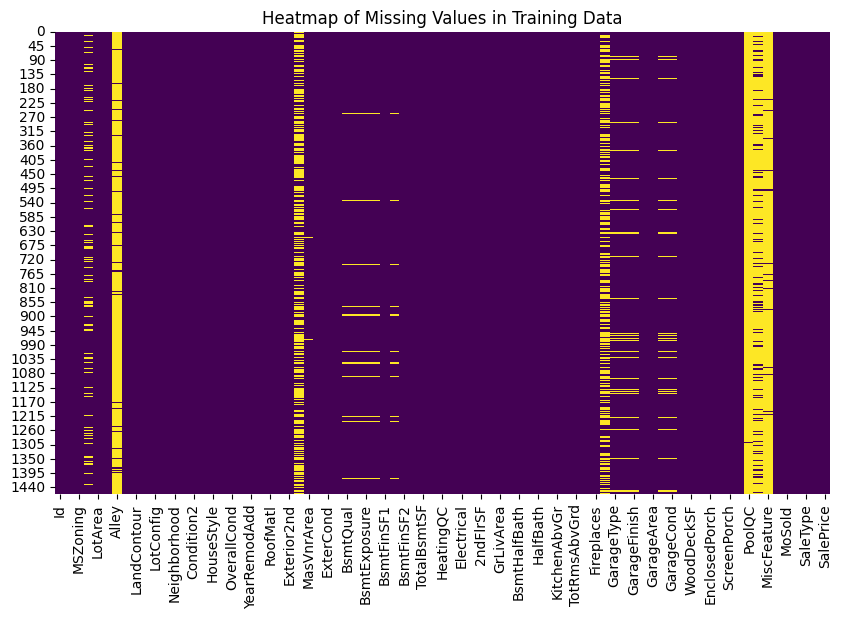

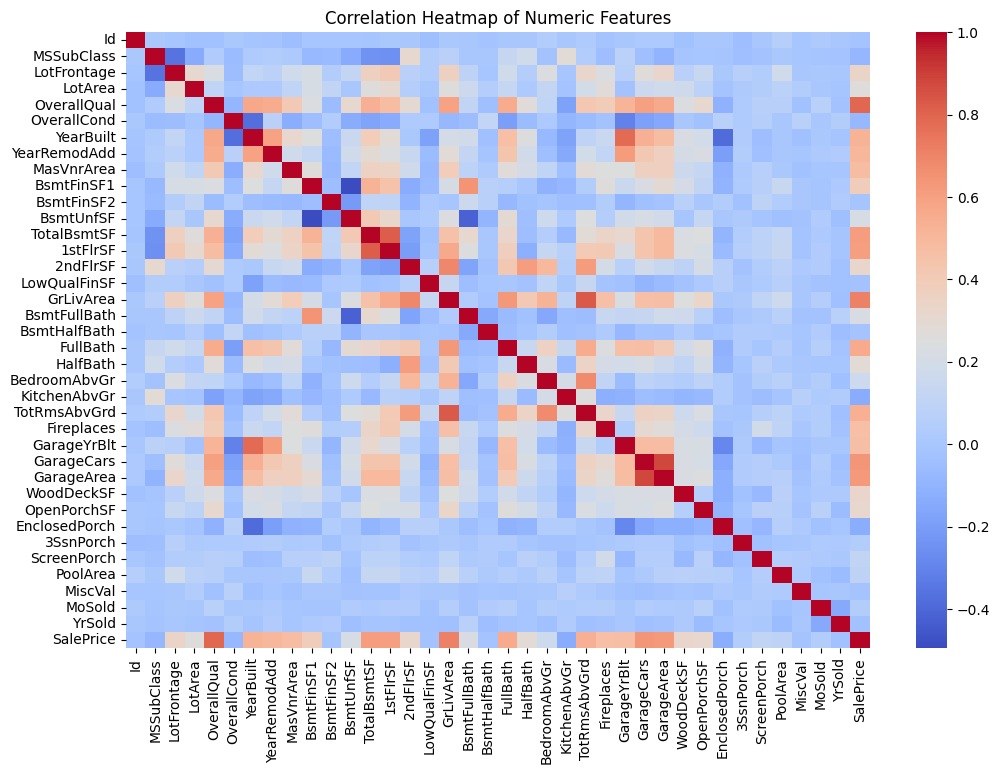

Most Correlated Features with Target Variable:
Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')
Performance Metrics - Linear Regression:
{'MSE': 1565677639.1441379, 'RMSE': 39568.644646287015, 'R2 Score': 0.7958786110456304}

Performance Metrics - Random Forest Regressor:
{'MSE': 876330673.3940114, 'RMSE': 29602.88285613432, 'R2 Score': 0.8857505339769141}


In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# File paths for datasets
train_file = "/content/train.csv"
test_file = "/content/test.csv"

# Load datasets into dataframes
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

# Display data information
print("Training Data Overview:")
print(df_train.info())

print("\nTesting Data Overview:")
print(df_test.info())

# Identify missing values
print("\nMissing Values in Training Data:")
missing_train = df_train.isnull().sum()
print(missing_train[missing_train > 0])

# Heatmap for missing values in the training data
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.isnull(), cmap="viridis", cbar=False)
plt.title("Heatmap of Missing Values in Training Data")
plt.show()

# Drop columns with more than 30% missing values
missing_percentage_train = (df_train.isnull().sum() / len(df_train)) * 100
columns_to_drop = missing_percentage_train[missing_percentage_train > 30].index
df_train.drop(columns=columns_to_drop, inplace=True)
df_test.drop(columns=columns_to_drop, inplace=True)

# Fill missing values for numerical and categorical features
imputer_num = SimpleImputer(strategy="mean")
imputer_cat = SimpleImputer(strategy="most_frequent")

for feature in df_train.columns:
    if df_train[feature].dtype in ["int64", "float64"]:
        df_train[feature] = imputer_num.fit_transform(df_train[[feature]])
        if feature in df_test.columns:
            df_test[feature] = imputer_num.transform(df_test[[feature]])
    elif df_train[feature].dtype == "object":
        df_train[feature] = imputer_cat.fit_transform(df_train[[feature]]).ravel()
        if feature in df_test.columns:
            df_test[feature] = imputer_cat.transform(df_test[[feature]]).ravel()

# Heatmap to visualize correlations among numeric features
numeric_columns = df_train.select_dtypes(include=["number"]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df_train[numeric_columns].corr(), cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Define target variable and predictors
target = "SalePrice"
features = df_train.drop(target, axis=1)
labels = df_train[target]

# Split data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Determine top features correlated with the target variable
correlation_matrix = df_train[numeric_columns].corr()
most_correlated_features = correlation_matrix[target].sort_values(ascending=False).head(10).index
print("Most Correlated Features with Target Variable:")
print(most_correlated_features)

# Select subset of data based on top features
X_train_subset = X_train[most_correlated_features.intersection(X_train.select_dtypes(include=["number"]).columns)]
X_validation_subset = X_validation[most_correlated_features.intersection(X_validation.select_dtypes(include=["number"]).columns)]

# Initialize models
linear_model = LinearRegression()
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
linear_model.fit(X_train_subset, y_train)
forest_model.fit(X_train_subset, y_train)

# Make predictions
linear_predictions = linear_model.predict(X_validation_subset)
forest_predictions = forest_model.predict(X_validation_subset)

# Function to evaluate models
def model_performance(y_true, y_predicted):
    mse = mean_squared_error(y_true, y_predicted)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_predicted)
    return {"MSE": mse, "RMSE": rmse, "R2 Score": r2}

# Evaluate models
linear_eval = model_performance(y_validation, linear_predictions)
forest_eval = model_performance(y_validation, forest_predictions)

print("Performance Metrics - Linear Regression:")
print(linear_eval)

print("\nPerformance Metrics - Random Forest Regressor:")
print(forest_eval)


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [11]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

# Load and preprocess the dataset
data = pd.read_csv('/content/annotated_imdb_reviews.csv')
data = data.dropna(subset=['clean_text', 'sentiment'])
data_sampled = data.sample(n=100, random_state=42)

# Map sentiment labels to numerical format
label_mapping = {'positive': 1, 'negative': 0}
data_sampled['sentiment_label'] = data_sampled['sentiment'].map(label_mapping)

# Initialize a sentiment analysis pipeline
model_name = "facebook/bart-large-mnli"
sentiment_pipeline = pipeline("zero-shot-classification", model_name)

# Define candidate labels for classification
classification_labels = ["positive", "negative"]

# Predict sentiments for each review
predicted_labels_text = []
for review in data_sampled['clean_text']:
    result = sentiment_pipeline(review, classification_labels)
    predicted_labels_text.append(result['labels'][0])

# Convert predicted text labels to numerical format
predicted_labels_num = [label_mapping[label] if label in label_mapping else -1 for label in predicted_labels_text]

# Extract actual labels
actual_sentiment_labels = data_sampled['sentiment_label']

# Compute evaluation metrics
accuracy = accuracy_score(actual_sentiment_labels, predicted_labels_num)
precision = precision_score(actual_sentiment_labels, predicted_labels_num, average='weighted')
recall = recall_score(actual_sentiment_labels, predicted_labels_num, average='weighted')
f1 = f1_score(actual_sentiment_labels, predicted_labels_num, average='weighted')

# Print results
print(f"Accuracy Score: {accuracy:.3f}")
print(f"Precision Score: {precision:.3f}")
print(f"Recall Score: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Accuracy Score: 0.610
Precision Score: 0.956
Recall Score: 0.610
F1 Score: 0.715
